### Base de dados atendimentos ambulatoriais
Fonte: DATASUS/Ministério da Saúde

Descrição: Conteúdo = QTD. Apresentada, Esfera Jurídica = Administração pública Municipal.

Site: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sia/cnv/qabr.def

Acesso em: 20/10/2021

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
auxiliar = pd.read_excel(r'E:\Documentos\bases\indice_conectar\ambulatorial\ambulatorial.xlsx', 
                             sheet_name='base', dtype={'COD': str})

In [3]:
auxiliar

,COD,Município,2016,2017,2018,2019,2020,2021,Total
0,110001,Alta Floresta D'Oeste,-,322119,285189,300424,240115,179061,1326908
1,110037,Alto Alegre dos Parecis,-,42112,67583,157793,75481,23351,366320
2,110040,Alto Paraíso,-,178176,114962,500708,135973,82131,1011950
3,110034,Alvorada D'Oeste,-,86248,68471,61219,20786,7906,244630
4,110002,Ariquemes,-,807022,1034495,1370834,1244250,925374,5381975
...,...,...,...,...,...,...,...,...,...
5561,522190,Varjão,-,1018128,31706,38352,34832,35046,1158064
5562,522200,Vianópolis,-,100372,12932,17511,13507,10989,155311
5563,522205,Vicentinópolis,-,303409,55727,72209,53272,31059,515676
5564,522220,Vila Boa,-,77952,56307,59281,70308,40110,303958


## Descrição

In [6]:
base = auxiliar[['COD', 'Município', 2017, 2018, 2019, 2020]]

In [7]:
base = base.replace('-', np.nan)

In [8]:
print('Quantidade de municipios na base de dados: {0}'.format(len(base)))
print('Quantidade de municípios que não estão na base: {0}'.format(5568 - len(base)))

Quantidade de municipios na base de dados: 5566
Quantidade de municípios que não estão na base: 2


In [9]:
print('Quantidade de municipios sem valor(zero) para cada ano')
print(base[[2017, 2018, 2019, 2020]].isna().sum())

Quantidade de municipios sem valor(zero) para cada ano
2017     4
2018    42
2019    62
2020    97
dtype: int64


In [10]:
#Municipios com somente um valor
base[base[[2017, 2018, 2019, 2020]].isna().sum(axis=1) >= 3]
#30 municipios

,COD,Município,2017,2018,2019,2020
74,130002,Alvarães,"68,123.0000",nan,nan,nan
76,130008,Anamã,"7,379.0000",nan,nan,nan
116,130330,Novo Aripuanã,"70,171.0000",nan,nan,nan
131,130426,Uarini,"41,628.0000",nan,nan,nan
294,160020,Calçoene,"44,168.0000",nan,nan,nan
295,160021,Cutias,"7,708.0000",nan,nan,nan
702,220202,Buriti dos Montes,54.0000,nan,nan,nan
2261,310200,Alterosa,"85,421.0000",nan,nan,nan
2522,312520,Fama,"6,102.0000",nan,nan,nan
2720,314150,Mendes Pimentel,"1,244.0000",nan,nan,nan


In [11]:
#Municipios com muita variação nos dados - 20 primeiros
base['cv'] = (base[[2017, 2018, 2019, 2020]].std(axis=1)) / (base[[2017, 2018, 2019, 2020]].mean(axis=1))
variação = base.sort_values('cv', ascending=False).head(20)

In [12]:
len(variação[variação['cv'] > 0.4])

20

In [13]:
base.describe()

,2017,2018,2019,2020,cv
count,"5,562.0000","5,524.0000","5,504.0000","5,469.0000","5,536.0000"
mean,"413,204.7375","346,128.2256","354,443.4257","256,290.7937",0.6901
std,"2,138,814.9644","2,068,129.2000","2,167,715.6744","1,595,377.2133",0.5195
min,54.0000,17.0000,18.0000,4.0000,0.0239
25%,"51,521.0000","19,858.2500","19,730.7500","13,091.0000",0.2798
50%,"121,441.0000","79,080.0000","79,244.0000","55,554.0000",0.5112
75%,"312,206.0000","226,279.2500","228,714.0000","167,467.0000",0.9987
max,"127,992,511.0000","129,857,399.0000","139,394,879.0000","103,804,279.0000",1.9952


<AxesSubplot:>

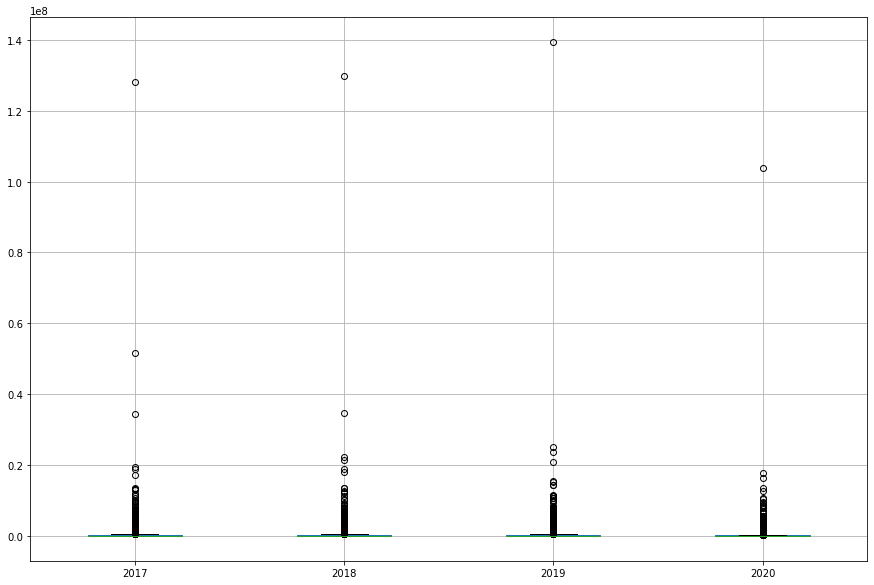

In [14]:
base[[2017, 2018, 2019, 2020]].boxplot(figsize=(15, 10))

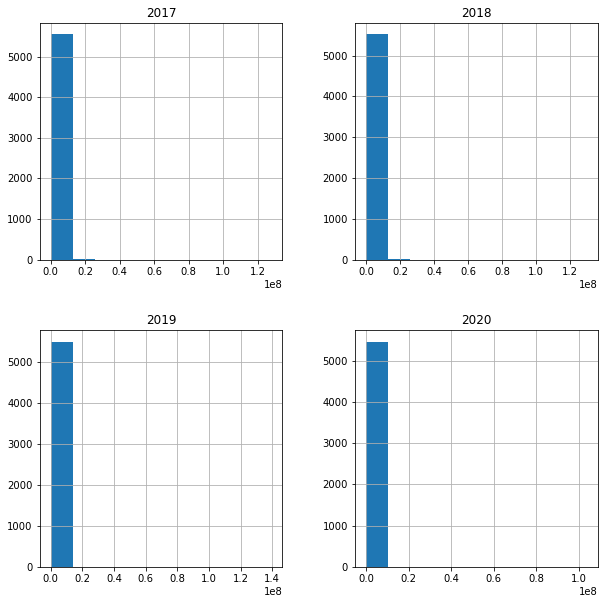

In [15]:
base[[2017, 2018, 2019, 2020]].hist(figsize=(10, 10));

## Razão Atendimento / População
### Inclui tratamendo dos municípios sem informação

In [17]:
#Cópia da base auxiliar apenas os anos 2017 a 2020
ambulatorial_aux = auxiliar[['COD', 2017, 2018, 2019, 2020]].copy()

#Renomeia as colunas
ambulatorial_aux.rename(columns={'COD': 'COD 6', 2017: 'amb_2017', 2018:'amb_2018', 2019:'amb_2019', 2020: 'amb_2020'}, 
                    inplace=True)

In [18]:
#Acrecenta base dados da população
população = pd.read_excel(r'E:\Documentos\bases\indice_conectar\população\população_base.xlsx', 
                          dtype={'COD. UF': str, 'COD':str, 'COD 6': str, 'COD. MUNIC': str})

#Merge das duas base
ambulatorial = pd.merge(população, ambulatorial_aux, left_on='COD 6', right_on='COD 6', how='left')

In [19]:
ambulatorial.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'COD', 'COD 6', 'NOME DO MUNICÍPIO',
       'pop_2017', 'pop_2018', 'pop_2019', 'pop_2020', 'munic_cod7',
       'categoria', 'amb_2017', 'amb_2018', 'amb_2019', 'amb_2020'],
      dtype='object')

In [20]:
#Substitui NaN por zero
ambulatorial.replace('-', 0, inplace=True)

In [21]:
ambulatorial[['amb_2017', 'amb_2018', 'amb_2019', 'amb_2020']] = ambulatorial[['amb_2017', 'amb_2018', 'amb_2019', 'amb_2020']].astype(float)

In [22]:
ambulatorial['rz_2017'] = ambulatorial['amb_2017'] / ambulatorial['pop_2017']
ambulatorial['rz_2018'] = ambulatorial['amb_2018'] / ambulatorial['pop_2018']
ambulatorial['rz_2019'] = ambulatorial['amb_2019'] / ambulatorial['pop_2019']
ambulatorial['rz_2020'] = ambulatorial['amb_2020'] / ambulatorial['pop_2020']

In [23]:
#Municipios sem dados de atendimento
ambulatorial[ambulatorial['amb_2017'].isna()]

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,munic_cod7,categoria,amb_2017,amb_2018,amb_2019,amb_2020,rz_2017,rz_2018,rz_2019,rz_2020
100,AM,13,01803,1301803,130180,Ipixuna,28299,28933,29689,30436,1301803,6,nan,nan,nan,nan,nan,nan,nan,nan
103,AM,13,01951,1301951,130195,Itamarati,8128,7888,7851,7814,1301951,7,nan,nan,nan,nan,nan,nan,nan,nan


In [24]:
#Converter em integer
colunas = ['amb_2017', 'amb_2018', 'amb_2019', 'amb_2020']
ambulatorial[colunas] = ambulatorial[colunas].replace(np.nan, 0)
ambulatorial[colunas] = ambulatorial[colunas].astype(int)

In [25]:
ambulatorial['razão_amb-pop'] = ambulatorial[['rz_2017', 'rz_2018', 'rz_2019', 'rz_2020']].mean(axis=1, skipna=True)

In [26]:
ambulatorial.sort_values('razão_amb-pop')

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,...,categoria,amb_2017,amb_2018,amb_2019,amb_2020,rz_2017,rz_2018,rz_2019,rz_2020,razão_amb-pop
704,PI,22,02026,2202026,220202,Buriti dos Montes,8108,8223,8244,8264,...,7,54,0,0,0,0.0067,0.0000,0.0000,0.0000,0.0017
3566,SP,35,26605,3526605,352660,Lavrinhas,7150,7207,7260,7311,...,7,0,0,0,58,0.0000,0.0000,0.0000,0.0079,0.0020
4696,RS,43,04853,4304853,430485,Carlos Gomes,1547,1404,1377,1351,...,7,0,0,0,131,0.0000,0.0000,0.0000,0.0970,0.0242
875,PI,22,10656,2210656,221065,Sigefredo Pacheco,9880,10024,10041,10058,...,7,350,285,298,230,0.0354,0.0284,0.0297,0.0229,0.0291
799,PI,22,06654,2206654,220665,Morro Cabeça no Tempo,4066,4533,4532,4530,...,7,237,247,185,82,0.0583,0.0545,0.0408,0.0181,0.0429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,MG,31,00708,3100708,310070,Água Comprida,2058,2005,1999,1992,...,7,250957,574757,491208,32770,121.9422,286.6618,245.7269,16.4508,167.6954
4381,SC,42,04459,4204459,420445,Coronel Martins,2548,2544,2549,2555,...,7,96058,43815,46647,2543832,37.6994,17.2229,18.3001,995.6290,267.2128
538,MA,21,05203,2105203,210520,Igarapé Grande,11206,11252,11320,11387,...,7,1342357,2881106,6733921,1192356,119.7891,256.0528,594.8693,104.7120,268.8558
100,AM,13,01803,1301803,130180,Ipixuna,28299,28933,29689,30436,...,6,0,0,0,0,nan,nan,nan,nan,nan


In [27]:
ambulatorial['razão_amb-pop'].describe()

count   5,566.0000
mean       10.6371
std        13.2201
min         0.0017
25%         3.7867
50%         7.5261
75%        12.8296
max       268.8558
Name: razão_amb-pop, dtype: float64

<AxesSubplot:>

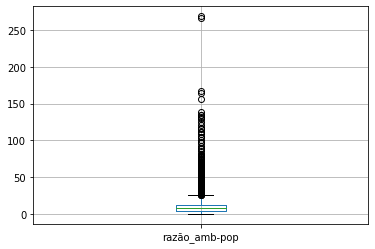

In [28]:
ambulatorial[['razão_amb-pop']].boxplot()

In [29]:
## TRATAMENTO DOS VALORES
##Calculando valores da média para preencher NaN

#criando uma cópia
ambulatorial_aux = ambulatorial.copy()

#Criar id para fazer o cruzamento
ambulatorial_aux['id'] = ambulatorial_aux['UF'] + ambulatorial_aux['categoria'].astype(str)

#Calculando a média por estado e categoria-cidade
media = pd.pivot_table(ambulatorial_aux, index=['UF', 'categoria'], values=['razão_amb-pop'], aggfunc=np.median).reset_index()

#Criando o id
media['id'] = media['UF'] + media['categoria'].astype(str)

#Preencendo o Nan
ambulatorial_aux = ambulatorial_aux.fillna(ambulatorial_aux[['id']].join(media.set_index('id'), on='id'))

#Removendo as colunas desnecessárias
#base_aux_1.drop(['munic_cod7', 'categoria', 'id'], axis=1, inplace=True)

In [30]:
ambulatorial_aux.sort_values('razão_amb-pop')

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,...,amb_2017,amb_2018,amb_2019,amb_2020,rz_2017,rz_2018,rz_2019,rz_2020,razão_amb-pop,id
704,PI,22,02026,2202026,220202,Buriti dos Montes,8108,8223,8244,8264,...,54,0,0,0,0.0067,0.0000,0.0000,0.0000,0.0017,PI7
3566,SP,35,26605,3526605,352660,Lavrinhas,7150,7207,7260,7311,...,0,0,0,58,0.0000,0.0000,0.0000,0.0079,0.0020,SP7
4696,RS,43,04853,4304853,430485,Carlos Gomes,1547,1404,1377,1351,...,0,0,0,131,0.0000,0.0000,0.0000,0.0970,0.0242,RS7
875,PI,22,10656,2210656,221065,Sigefredo Pacheco,9880,10024,10041,10058,...,350,285,298,230,0.0354,0.0284,0.0297,0.0229,0.0291,PI7
799,PI,22,06654,2206654,220665,Morro Cabeça no Tempo,4066,4533,4532,4530,...,237,247,185,82,0.0583,0.0545,0.0408,0.0181,0.0429,PI7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,PR,41,28302,4128302,412830,Uniflor,2614,2595,2605,2614,...,29037,484608,937881,175402,11.1083,186.7468,360.0311,67.1010,156.2468,PR7
586,MA,21,08108,2108108,210810,Paulo Ramos,20657,21015,21040,21066,...,95449,1868529,11196022,724378,4.6207,88.9141,532.1303,34.3861,165.0128,MA7
2249,MG,31,00708,3100708,310070,Água Comprida,2058,2005,1999,1992,...,250957,574757,491208,32770,121.9422,286.6618,245.7269,16.4508,167.6954,MG7
4381,SC,42,04459,4204459,420445,Coronel Martins,2548,2544,2549,2555,...,96058,43815,46647,2543832,37.6994,17.2229,18.3001,995.6290,267.2128,SC7


In [31]:
base_ambulatorial_completa = ambulatorial_aux[['UF', 'COD. UF', 'COD', 'COD 6', 'NOME DO MUNICÍPIO', 
                     'razão_amb-pop']]

In [32]:
base_ambulatorial_completa

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_amb-pop
0,RO,11,1100015,110001,Alta Floresta D'Oeste,12.1579
1,RO,11,1100023,110002,Ariquemes,10.3329
2,RO,11,1100031,110003,Cabixi,10.3852
3,RO,11,1100049,110004,Cacoal,3.1341
4,RO,11,1100056,110005,Cerejeiras,10.4845
...,...,...,...,...,...,...
5563,GO,52,5221908,522190,Varjão,72.8608
5564,GO,52,5222005,522200,Vianópolis,2.6275
5565,GO,52,5222054,522205,Vicentinópolis,14.2169
5566,GO,52,5222203,522220,Vila Boa,10.9227


## Indicador

In [33]:
#Lista dos Consorciados
consorciados = pd.read_excel(r'E:\Documentos\bases\cadastro\base_municipios - Definitiva 2021.xlsx', dtype={'COD IBGE': str})

In [35]:
consorciados.columns

Index(['COD IBGE', 'COD IBGE 6', 'UF', 'Estado', 'UF Codigo', 'Região',
       'Município', 'Município-UF', 'População', 'Categoria', 'Categoria Desc',
       'Capital', 'Status', 'Status Categoria 2', 'Consorciado',
       'Contrato Assinado 2021', 'Pagamento 2021', 'Pagamento - Data',
       'Edital', 'Regular', 'Valor Mensal', 'Valor Anual', 'Quantidade Votos',
       'Prefeito', 'Prefeito Nome Político', 'Prefeito Partido',
       'Prefeito CPF', 'Gênero_Pref', 'FNP Diretoria',
       'FNP Diretoria Descrição', 'CONECTAR Diretoria',
       'CONECTAR Diretoria Descrição'],
      dtype='object')

In [36]:
ambulatorial_completa_aux = pd.merge(base_ambulatorial_completa, consorciados[['COD IBGE', 'Consorciado']], 
                                     left_on='COD', right_on='COD IBGE')

In [37]:
ambulatorial_completa_aux

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_amb-pop,COD IBGE,Consorciado
0,RO,11,1100015,110001,Alta Floresta D'Oeste,12.1579,1100015,Não
1,RO,11,1100023,110002,Ariquemes,10.3329,1100023,Sim
2,RO,11,1100031,110003,Cabixi,10.3852,1100031,Não
3,RO,11,1100049,110004,Cacoal,3.1341,1100049,Não
4,RO,11,1100056,110005,Cerejeiras,10.4845,1100056,Não
...,...,...,...,...,...,...,...,...
5563,GO,52,5221908,522190,Varjão,72.8608,5221908,Não
5564,GO,52,5222005,522200,Vianópolis,2.6275,5222005,Não
5565,GO,52,5222054,522205,Vicentinópolis,14.2169,5222054,Não
5566,GO,52,5222203,522220,Vila Boa,10.9227,5222203,Não


In [41]:
#Selecionar apenas consorciados
ambulatorial_consorcio = ambulatorial_completa_aux[ambulatorial_completa_aux['Consorciado'] == 'Sim']
ambulatorial_consorcio = ambulatorial_consorcio.drop('Consorciado', axis=1)
ambulatorial_consorcio = ambulatorial_consorcio.drop('COD IBGE', axis=1)

In [42]:
#BASE
ambulatorial_consorcio

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_amb-pop
1,RO,11,1100023,110002,Ariquemes,10.3329
9,RO,11,1100106,110010,Guajará-Mirim,7.2184
11,RO,11,1100122,110012,Ji-Paraná,37.3922
16,RO,11,1100205,110020,Porto Velho,10.1650
34,RO,11,1100940,110094,Cujubim,15.4765
...,...,...,...,...,...,...
5538,GO,52,5220058,522005,São João da Paraúna,11.7974
5539,GO,52,5220108,522010,São Luís de Montes Belos,23.9803
5540,GO,52,5220157,522015,São Luiz do Norte,29.3729
5554,GO,52,5221403,522140,Trindade,7.2774


In [43]:
ambulatorial_consorcio['razão_amb-pop'].describe()

count   2,134.0000
mean       11.6226
std        12.7286
min         0.0020
25%         4.8703
50%         8.6823
75%        13.8597
max       167.6954
Name: razão_amb-pop, dtype: float64

<AxesSubplot:>

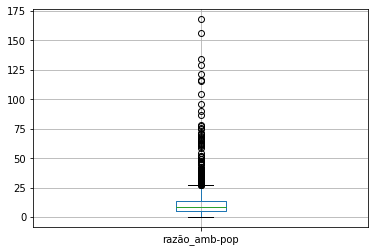

In [44]:
ambulatorial_consorcio.boxplot('razão_amb-pop')

In [45]:
#media = ambulatorial_consorcio['amb_total'].sum() / ambulatorial_consorcio['pop_total'].sum()
#print(media)

In [46]:
menor_c = ambulatorial_consorcio['razão_amb-pop'].nsmallest(1).values[0]
menor_log_c = np.log10(menor_c)

print(menor_c)
print(menor_log_c)

0.0019833128163041992
-2.702608781669412


In [47]:
maior_c = ambulatorial_consorcio['razão_amb-pop'].nlargest(1).values[0]
maior_log_c = np.log10(maior_c)

print(maior_c)
print(maior_log_c)

167.6954222254623
2.2245212073326415


In [48]:
def indicador(x):
    y = 1 - ((np.log10(x) - menor_log_c) / (maior_log_c - menor_log_c))
    y = round(y, 4)
    return y

In [49]:
ambulatorial_consorcio['indicadorPA'] = ambulatorial_consorcio['razão_amb-pop'].apply(lambda x: indicador(x))

In [50]:
ambulatorial_consorcio.head()

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_amb-pop,indicadorPA
1,RO,11,1100023,110002,Ariquemes,10.3329,0.2456
9,RO,11,1100106,110010,Guajará-Mirim,7.2184,0.2773
11,RO,11,1100122,110012,Ji-Paraná,37.3922,0.1323
16,RO,11,1100205,110020,Porto Velho,10.1650,0.2471
34,RO,11,1100940,110094,Cujubim,15.4765,0.2100


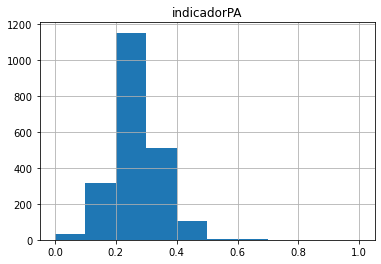

In [51]:
ambulatorial_consorcio.hist('indicadorPA');

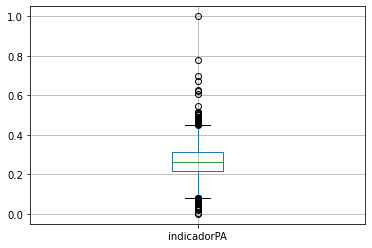

In [62]:
ambulatorial_consorcio[['indicadorPA']].boxplot();

In [52]:
ambulatorial_consorcio.shape

(2134, 7)

In [53]:
ambulatorial_consorcio.to_excel(r'E:\Documentos\bases\indice_conectar\ambulatorial\indicador_ambulatorial.xlsx', index=False)